# **Random Forest Regression in R**

## **Importing the dataset**

In [1]:
ds = read.csv('/content/Position_Salaries.csv')
cat("First three rows of dataset", "\n")
head(ds, 3)

First three rows of dataset 


,Position,Level,Salary
,<chr>,<int>,<int>
1,Business Analyst,1,45000
2,Junior Consultant,2,50000
3,Senior Consultant,3,60000


## **Splitting the dataset into the Train set and Test set**

In [2]:
ds = ds[2:3]

In [3]:
install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Salary, SplitRatio = 9/10)
split

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [4]:
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)
print(head(train_set,3))

  Level Salary
1     1  45000
2     2  50000
3     3  60000


In [5]:
print(head(test_set,3))

  Level Salary
5     5 110000


## **Fitting Random Forest Regression to the dataset**

In [6]:
install.packages("randomForest")
library(randomForest)
set.seed(1234) # to get the same set of results
regressor = randomForest(x = ds[1],
                         y = ds$Salary, # to make it a vector
                         ntree = 10)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.



## **Visualizing the Regression Model results**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin




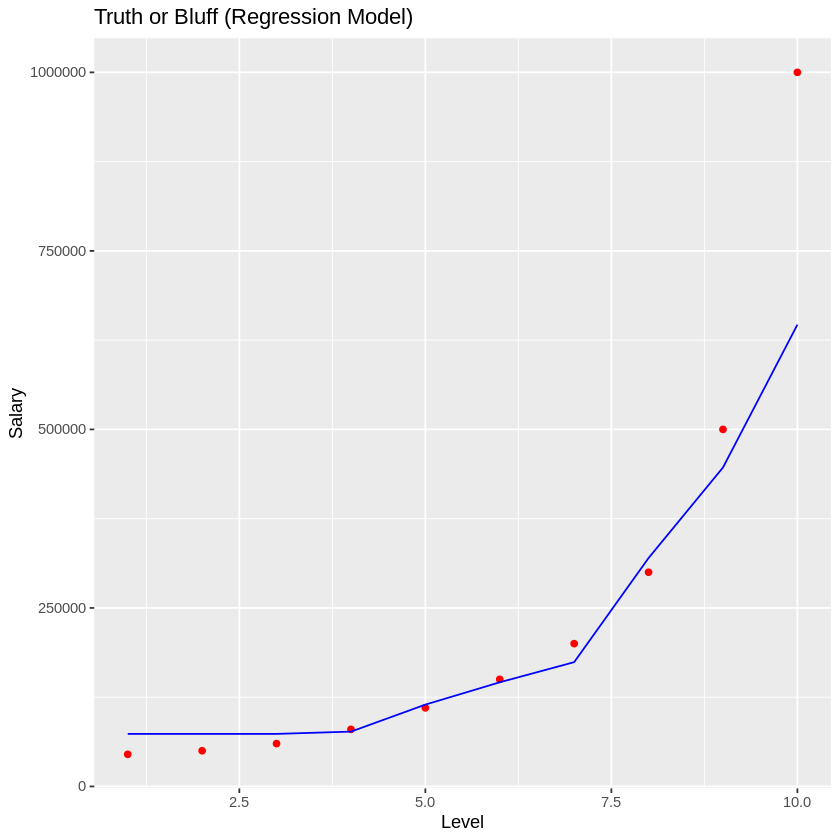

In [7]:
# Visualizing the Regression Model results - should not be run as we need resolution. RFR is non continuous. 
install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = ds$Level, y = ds$Salary),
             colour = 'red') +
  geom_line(aes(x = ds$Level, y = predict(regressor, newdata = ds)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Regression Model)') +
  xlab('Level') +
  ylab('Salary')

## **Visualizing the Random Forest Regression Model results (for higher resolution and smoother curve)**

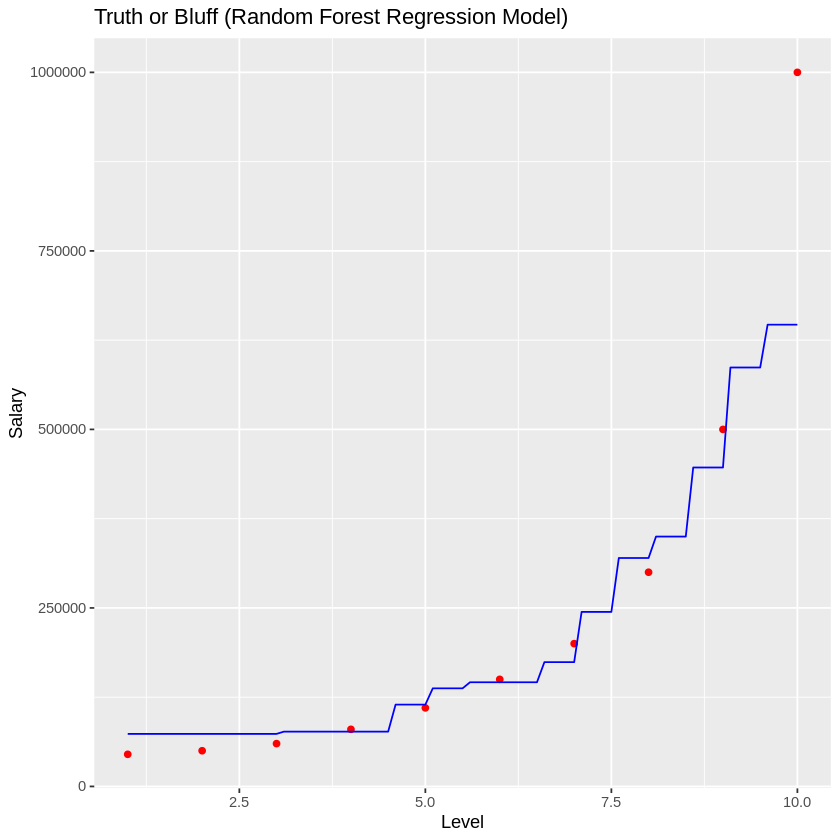

In [8]:
# Visualizing the Random Forest Regression Model results (for higher resolution and smoother curve)
#install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(ds$Level), max(ds$Level), 0.1)
ggplot() +
  geom_point(aes(x = ds$Level, y = ds$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Random Forest Regression Model)') +
  xlab('Level') +
  ylab('Salary')

## **Visualizing the Random Forest Regression Model results with 0.01 interval (for higher resolution and smoother curve)**

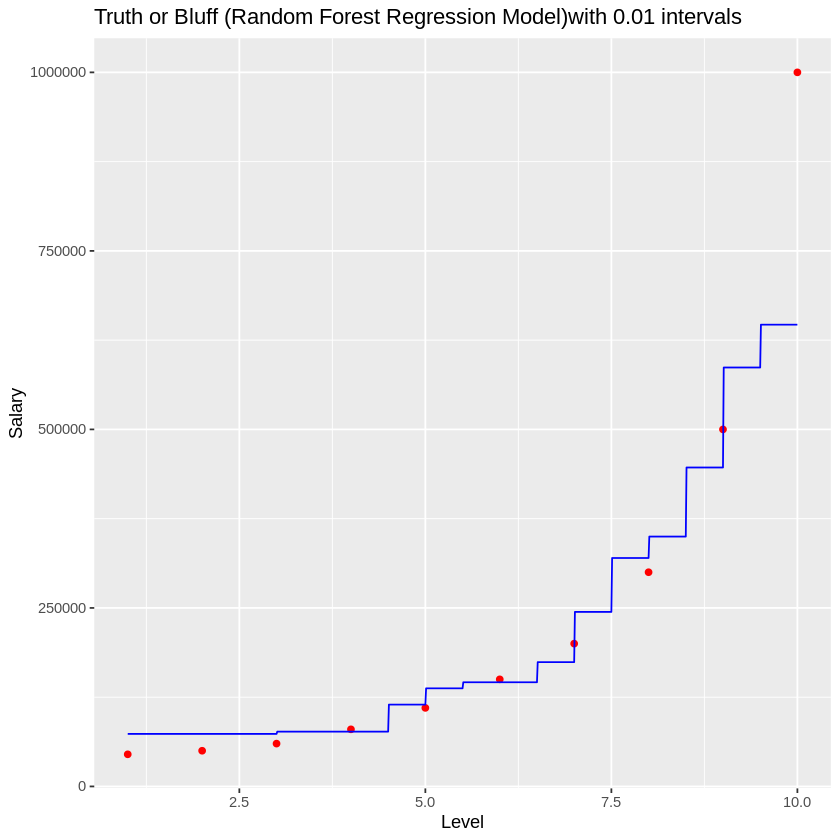

In [9]:
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(ds$Level), max(ds$Level), 0.01)
ggplot() +
  geom_point(aes(x = ds$Level, y = ds$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Random Forest Regression Model)with 0.01 intervals') +
  xlab('Level') +
  ylab('Salary')

In [10]:
# Predicting a new result
y_pred = predict(regressor, data.frame(Level = 6.5))
y_pred

1 
145900

In [11]:
y_pred = predict(regressor, newdata = test_set)
y_pred

5 
114633.3

## **Fitting the Random Forest Regression Model with 100 trees to the dataset**

In [12]:
#install.packages("randomForest")
#library(randomForest)
set.seed(1234) # to get the same set of results
regressor = randomForest(x = ds[1],
                         y = ds$Salary, # to make it a vector
                         ntree = 100)

## **Visualizing the Random Forest Regression Model results with 0.01 interval & 100 Trees(for higher resolution and smoother curve)**

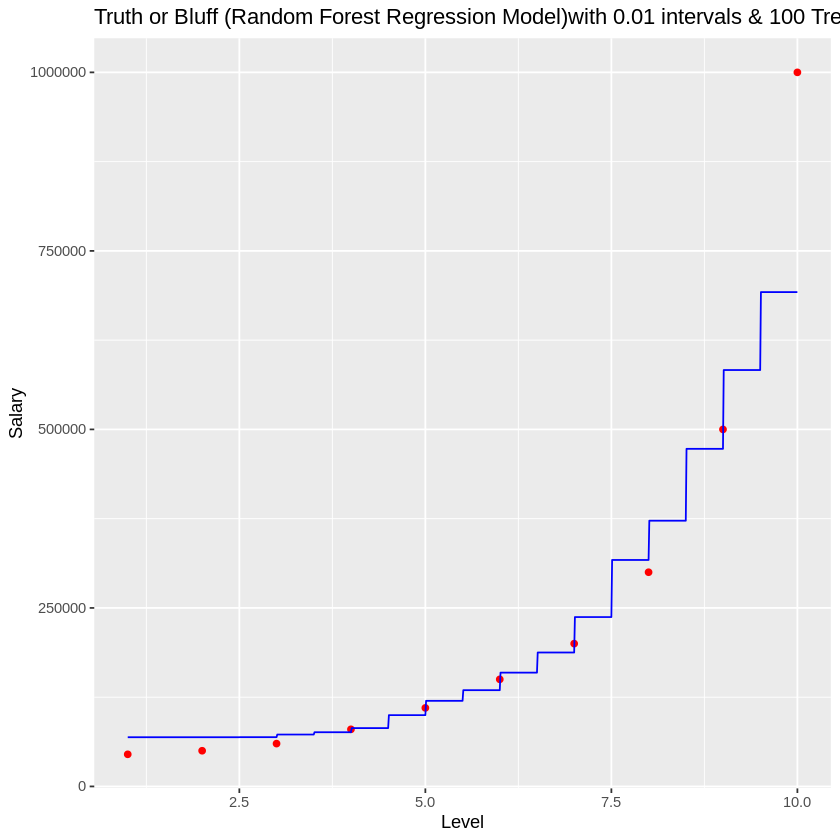

In [13]:
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(ds$Level), max(ds$Level), 0.01)
ggplot() +
  geom_point(aes(x = ds$Level, y = ds$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Random Forest Regression Model)with 0.01 intervals & 100 Trees') +
  xlab('Level') +
  ylab('Salary')

In [14]:
# Predicting a new result
y_pred100 = predict(regressor, data.frame(Level = 6.5))
y_pred100

1 
159386.7

In [15]:
y_pred100 = predict(regressor, newdata = test_set)
y_pred100

5 
99872.5

## **Fitting the Random Forest Regression Model with 500 trees to the dataset**

In [16]:
#install.packages("randomForest")
#library(randomForest)
set.seed(1234) # to get the same set of results
regressor = randomForest(x = ds[1],
                         y = ds$Salary, # to make it a vector
                         ntree = 500)

## **Visualizing the Random Forest Regression Model results with 0.01 interval & 500 Trees(for higher resolution and smoother curve)**

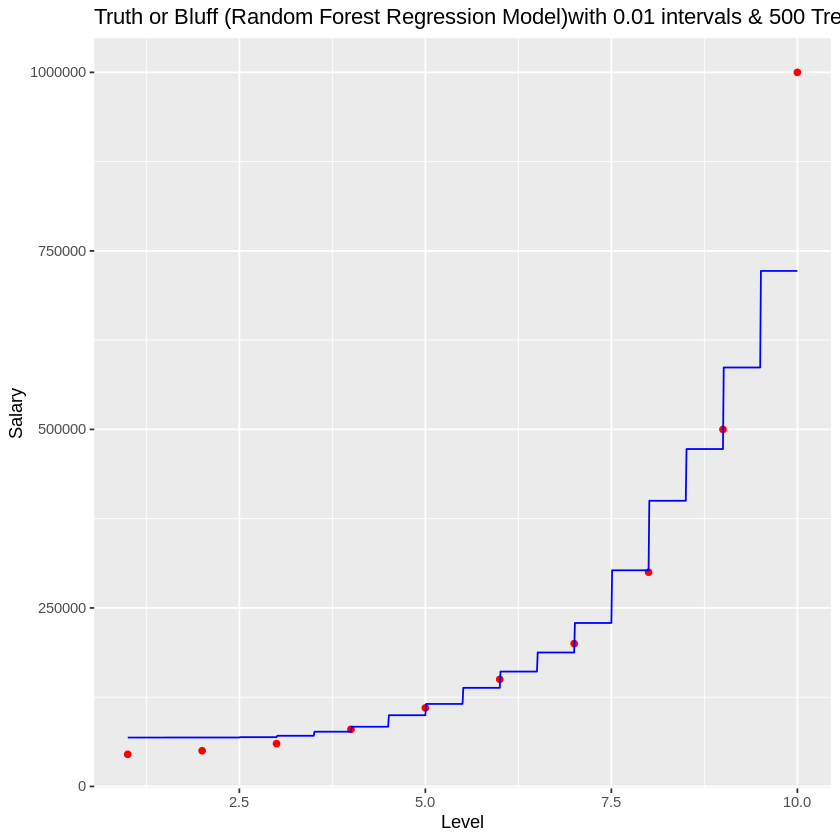

In [17]:
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(ds$Level), max(ds$Level), 0.01)
ggplot() +
  geom_point(aes(x = ds$Level, y = ds$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Random Forest Regression Model)with 0.01 intervals & 500 Trees') +
  xlab('Level') +
  ylab('Salary')

In [18]:
# Predicting a new result
y_pred500 = predict(regressor, data.frame(Level = 6.5))
y_pred500

1 
160907.7

In [19]:
y_pred500 = predict(regressor, newdata = test_set)
y_pred500

5 
99704.33